### Basic ensemble models

<div>
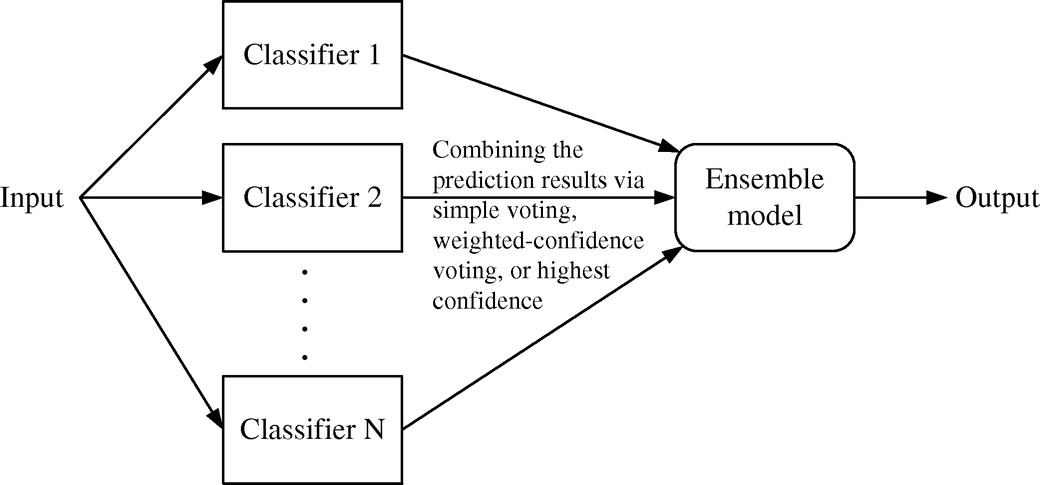
</div>

In [ ]:
# So the idea is to combine several classification models, and use the aggregated prediction
# The individual classifiers can be of the same type (this is what we will look at)
# but they can also be different (combining decision tree and logistic regression)
# The different models use different subsets of the dataset for training, and the prediction 
# for a new observation is calculated for each model and combined to have a final prediction

In [ ]:
# We start with the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classification performance evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Logistic regression
from sklearn.linear_model import LogisticRegression

# Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
# We will work with a dataset to predict which female patient has breast cancer
# Each patient had a tumor and the outcome is in the column diagnosis
# with categories M = malignant (cancerous), B = benign (noncancerous)

cancer = pd.read_csv('wbc.csv')
cancer.head()

In [ ]:
# Lets select the columns of interes
# Predictors
X = cancer[cancer.columns[2:32]]
# Outcome
y = cancer['diagnosis']

# Then we crate training and test set, with 25% of the data in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# We can start with a single decision tree model

# Inititalize model
cancer_tree = DecisionTreeClassifier(random_state = 0)

# Use training data
tree_model = cancer_tree.fit(X_train,y_train)

# Evaluate perfomance
# As we can see, we can get quite a good result already

pred_tree = tree_model.predict(X_test)
print(confusion_matrix(y_test,pred_tree))
print(classification_report(y_test,pred_tree))

In [ ]:
# What happens if we train several decision trees, and combine their evaluation?
# We have a function for this sklearn, as part of a set of other ensamble methods

from sklearn.ensemble import BaggingClassifier

# We start by creating a decision tree palceholder

cancer_bag = DecisionTreeClassifier(random_state = 0)

# We can then create a bagging classifier object, specify the base model, 
# and that we want to build 300 different decision trees
# Different in this case means that they will use different subsets of the training data

bag_cancer = BaggingClassifier(base_estimator = cancer_bag, n_estimators = 300)

# And we fit the training data
bag_cancer.fit(X_train, y_train)

In [ ]:
# We can evaluate the perfomance similarly
# As we can see, the performance improved, there are 4 more patient that are classified correctly
# Sometimes we observe large difference, sometime less, but in general it is beneficial to use more complex strategies

pred_bag = bag_cancer.predict(X_test)
print(confusion_matrix(y_test, pred_bag))
print(classification_report(y_test, pred_bag))

### Random forests

<div>
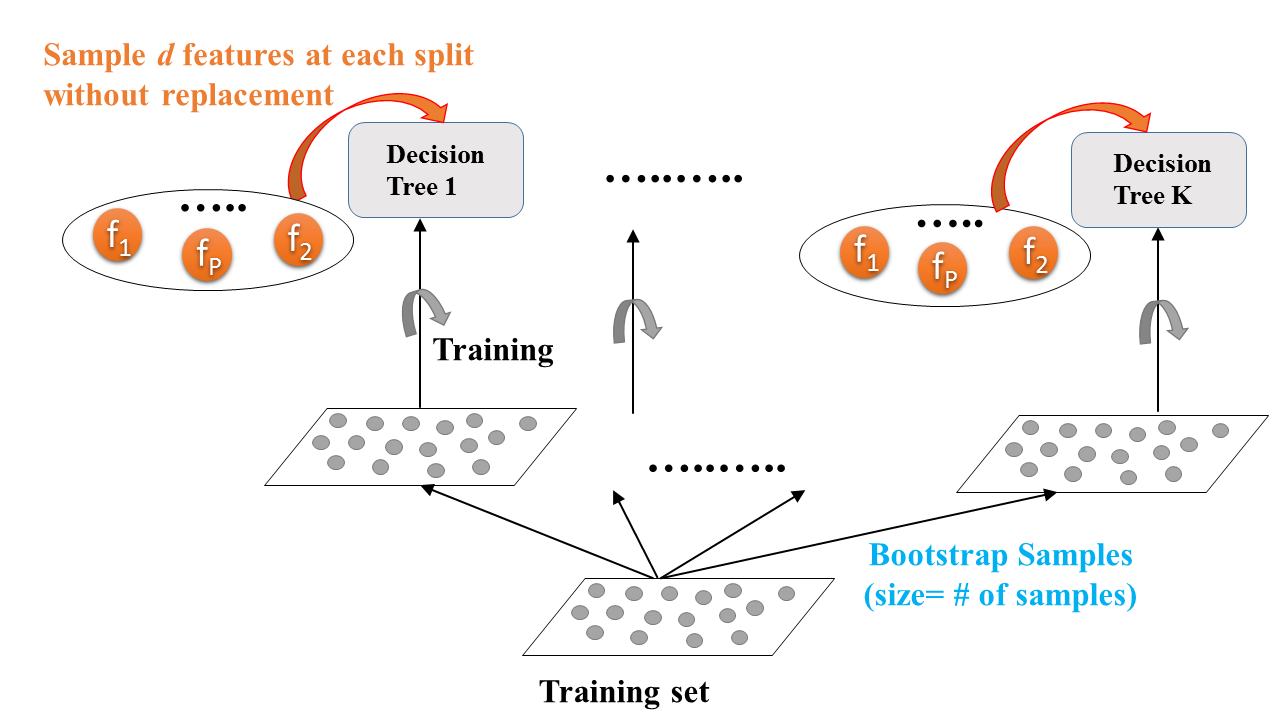
</div>

In [ ]:
# There can be more complex logics guiding ensemble models, and Random Forests (RF) is the most widely used approach
# The idea here, additionally to bagging, i.e. have separate models trainied on ifferent sets and combine the results
# is that in RF, not only data differs when training different models, but also the predictor variables
# For each node in each submodel, we select only a subset of features, and train the model based on those
# what we have to specify then is the numebr of features we want to look at in each step.
# For example if it is 5, every time when we need to split a tree, we randomly select 5 out of all the 
# features, and the algorithm can only split the data based on those features

# We have a function in sklearn
from sklearn.ensemble import RandomForestClassifier

In [1]:
# We can then create a bagging classifier object, specify the base model, 
# and that we want to build 300 different decision trees
# Different in this case means that they will use different subsets of the training data

# We use 400 trees
# By default, the number of features used in each node is the square root of the total number of columns

forest_cancer = RandomForestClassifier(n_estimators=400, random_state = 0)

# And we fit the training data
forest_cancer.fit(X_train, y_train)

# Finally look at the results

pred_forest = forest_cancer.predict(X_test)
print(confusion_matrix(y_test, pred_forest))

# As we can see, we improved even more, two misclassified cases are now corrected
print(classification_report(y_test, pred_forest))

NameError: name 'RandomForestClassifier' is not defined